# Jul 15th, 2022 (Fig-4 proportion)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Fig4_Props'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig4_Props

## Prepare (512)

In [3]:
mice = Mice(nn)
kwargs = {
    'mice': mice,
    'perc': perc,
    'num_k': None,
    'merge_thres': None,
    'n_resamples': int(1e5),
    'bin_edges': (0.2, 1),
    'n_cuts': 4,
}

## Results (K = 7)

In [4]:
%%time

num_k = 7
kwargs['num_k'] = num_k
kwargs['merge_thres'] = 0.444
results = proportion_results(**kwargs)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 39min 9s, sys: 8min 12s, total: 47min 22s
Wall time: 47min 49s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

### OCs

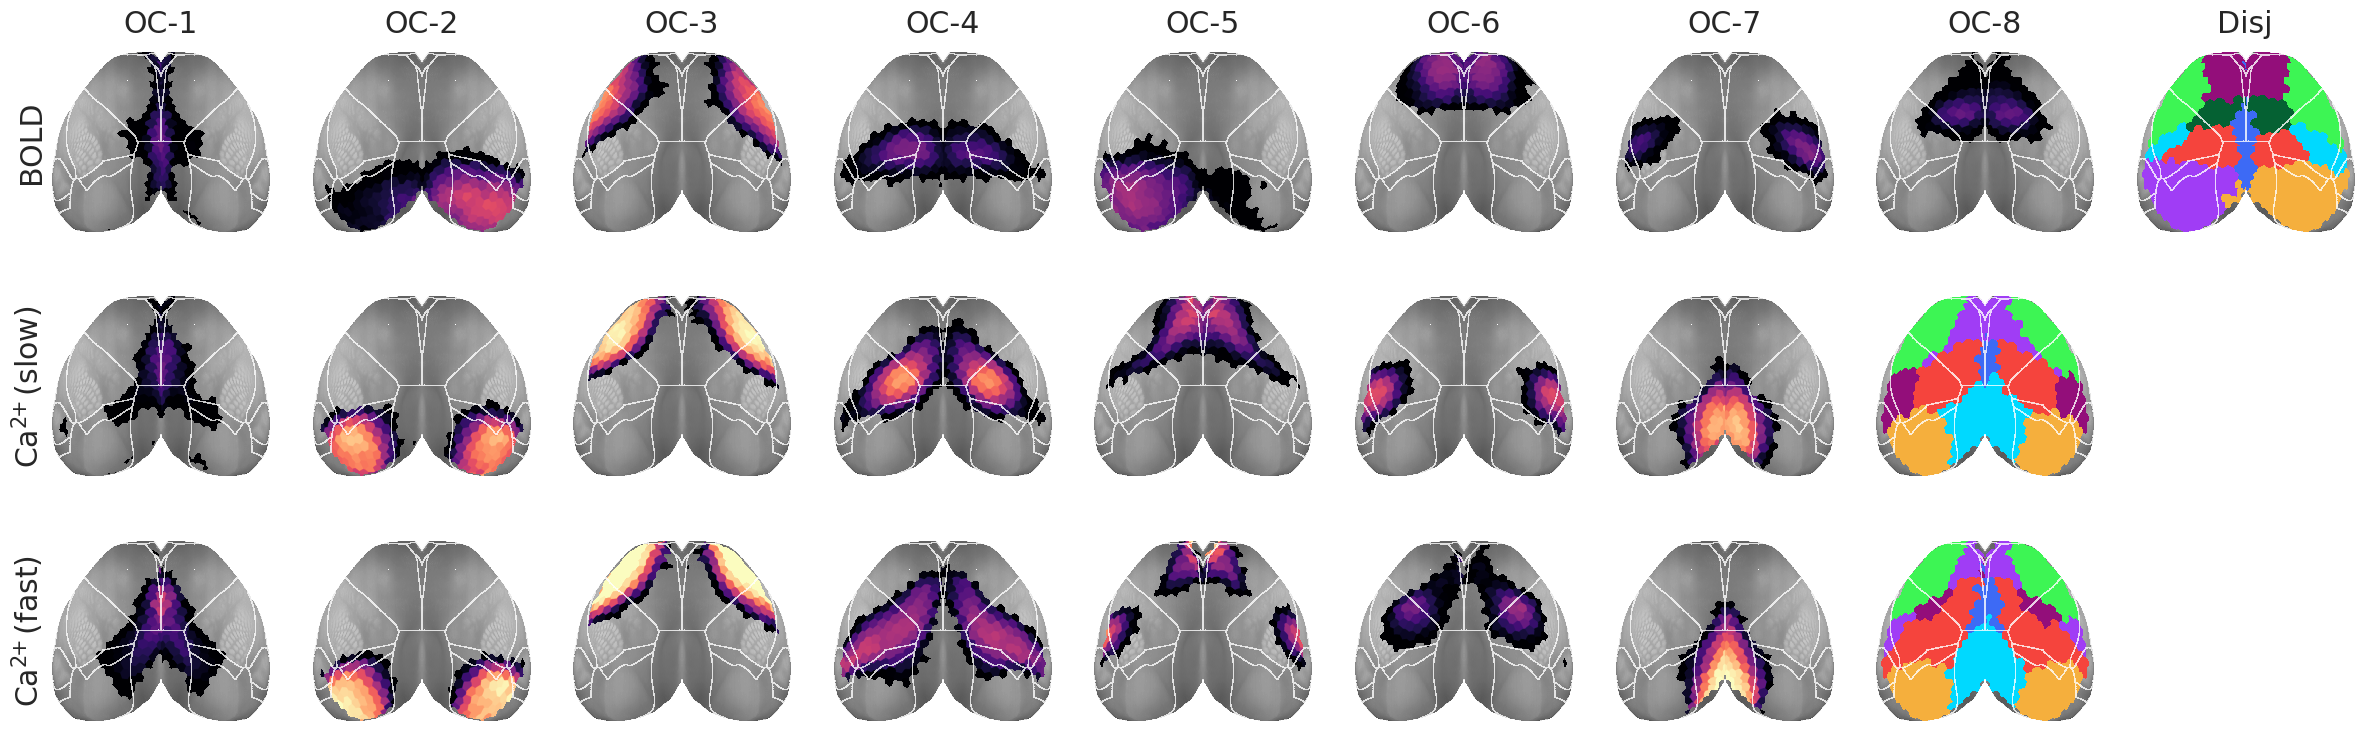

In [5]:
_ = bt.show(
    data={
        mode: avg(o.run_pi) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

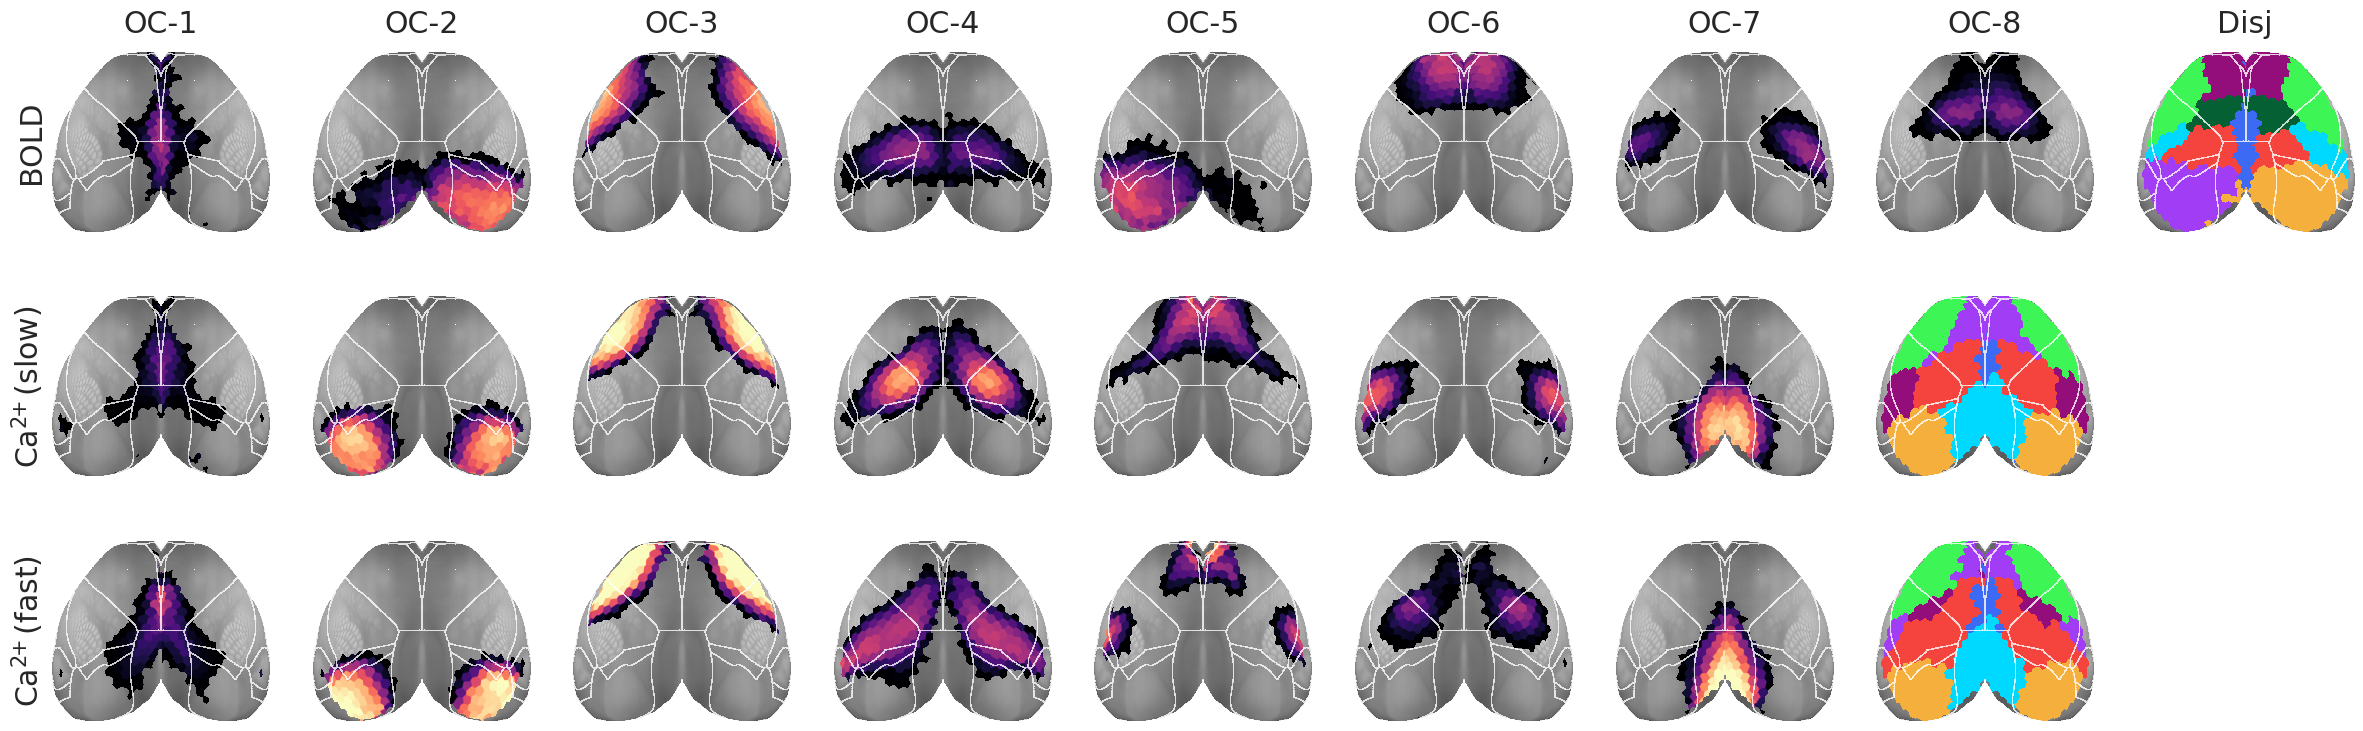

In [6]:
_ = bt.show(
    data={
        mode: avg(o.pi_prune) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

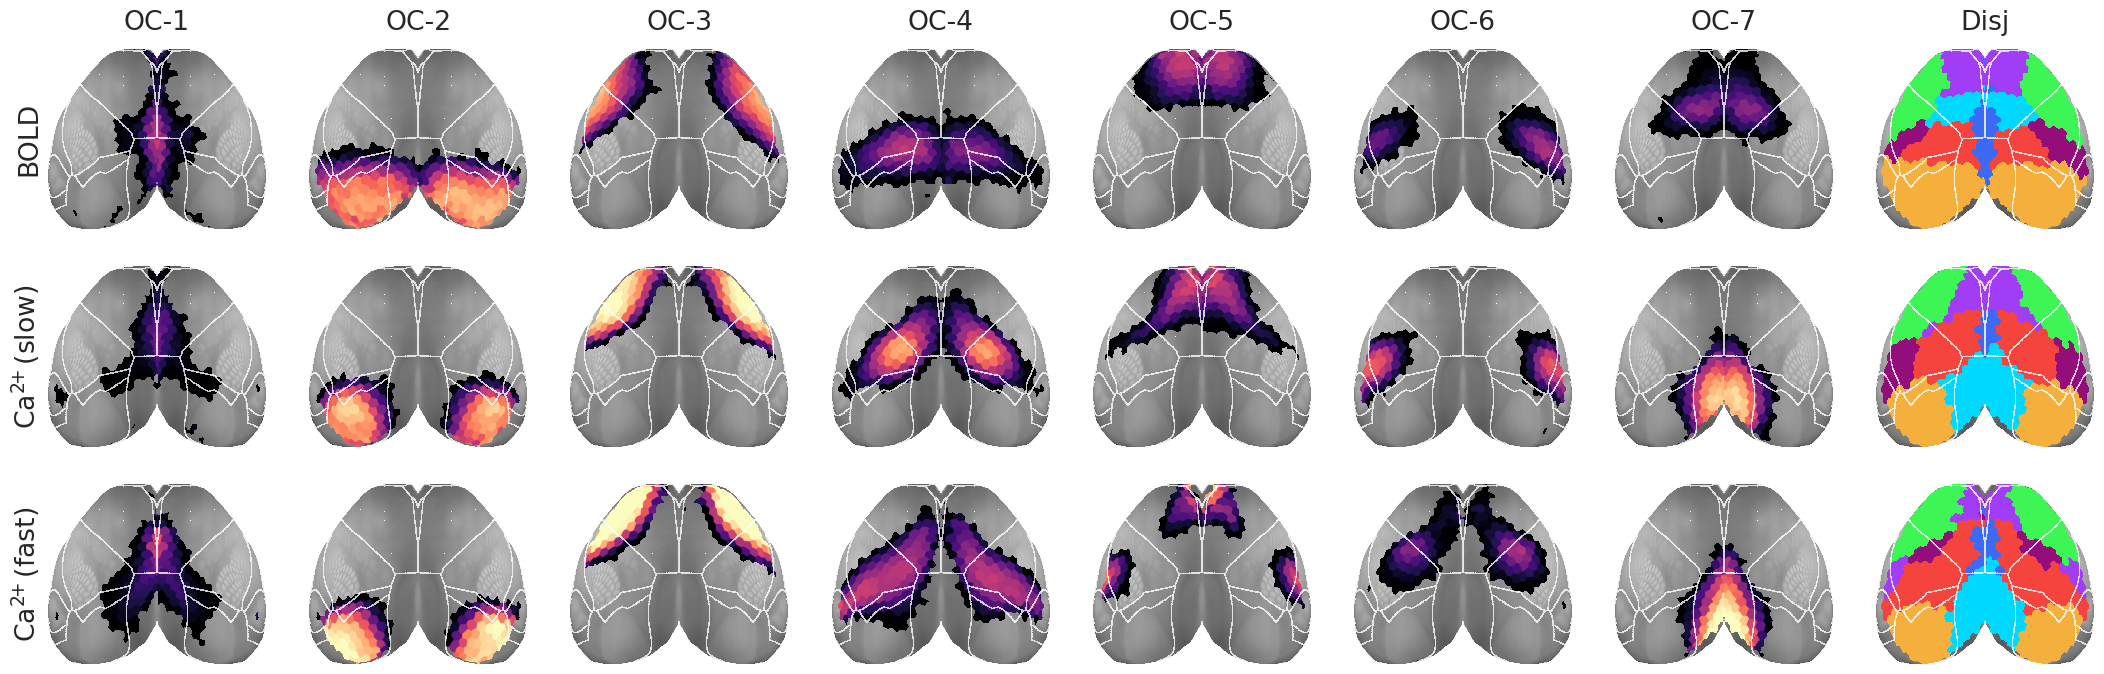

In [7]:
data = {}
for mode, o in results['bt_dict'].items():
    if mode == BOLD:
        data[mode] = avg(o.merge_vis(
            0.444, o.pi_prune)[0])
    else:
        data[mode] = avg(o.pi_prune)
_ = bt.show(data, **show_kws(num_k))

### Propotion plot

## Results (K = 3)

In [9]:
%%time

num_k = 3
kwargs['num_k'] = num_k
kwargs['merge_thres'] = None
results = proportion_results(**kwargs)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 13min 26s, sys: 4.54 s, total: 13min 30s
Wall time: 13min 41s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

### OCs

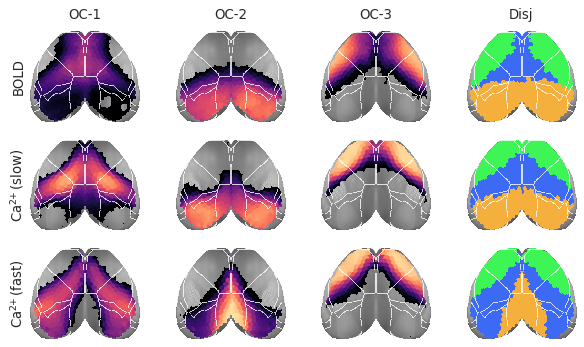

In [10]:
_ = bt.show(
    data={
        mode: avg(o.run_pi) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

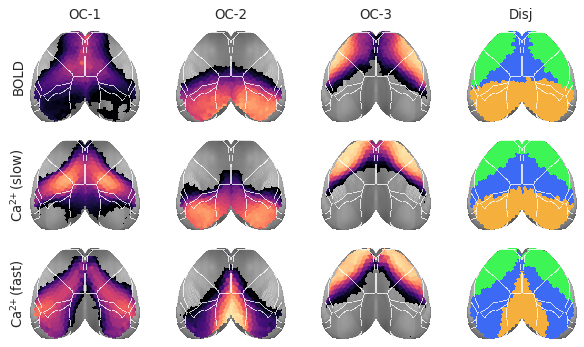

In [11]:
_ = bt.show(
    data={
        mode: avg(o.pi_prune) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

### Propotion plot

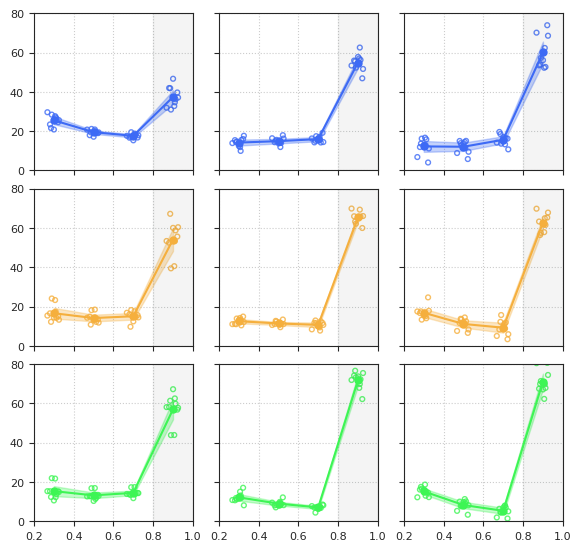

In [12]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'])

fig.savefig(pjoin(fig_dir, f'prop_ln_K{num_k}.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'props_ln_K{num_k}.png'), **kws_fig)

## Results (K = 20)

In [13]:
%%time

num_k = 20
kwargs['num_k'] = num_k
kwargs['merge_thres'] = None
results = proportion_results(**kwargs)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 2h 2min 24s, sys: 20min 57s, total: 2h 23min 22s
Wall time: 2h 23min 45s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

### OCs

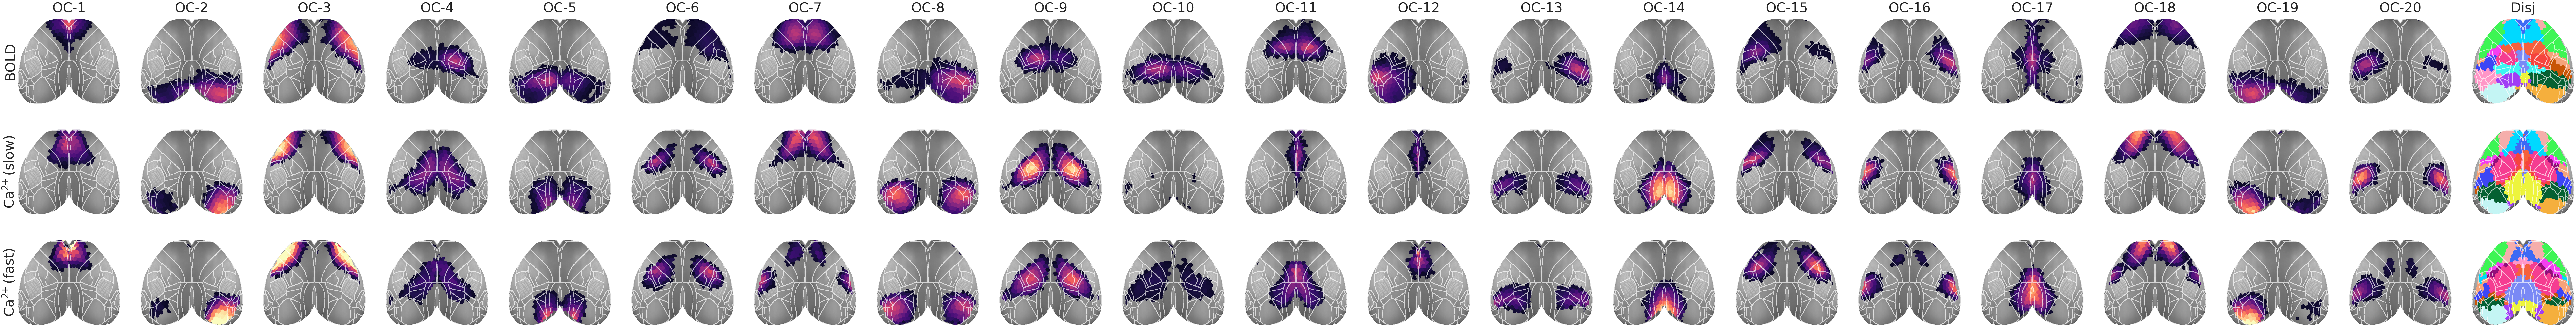

In [14]:
_ = bt.show(
    data={
        mode: avg(o.run_pi) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

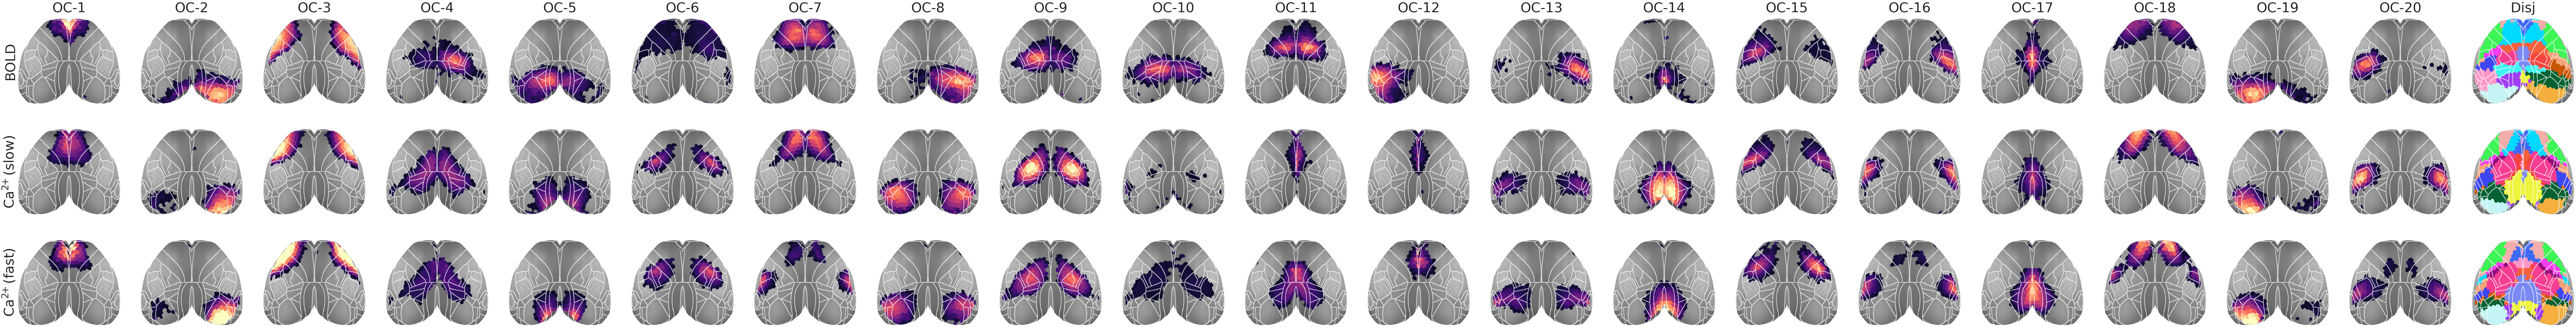

In [15]:
_ = bt.show(
    data={
        mode: avg(o.pi_prune) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

### Propotion plot

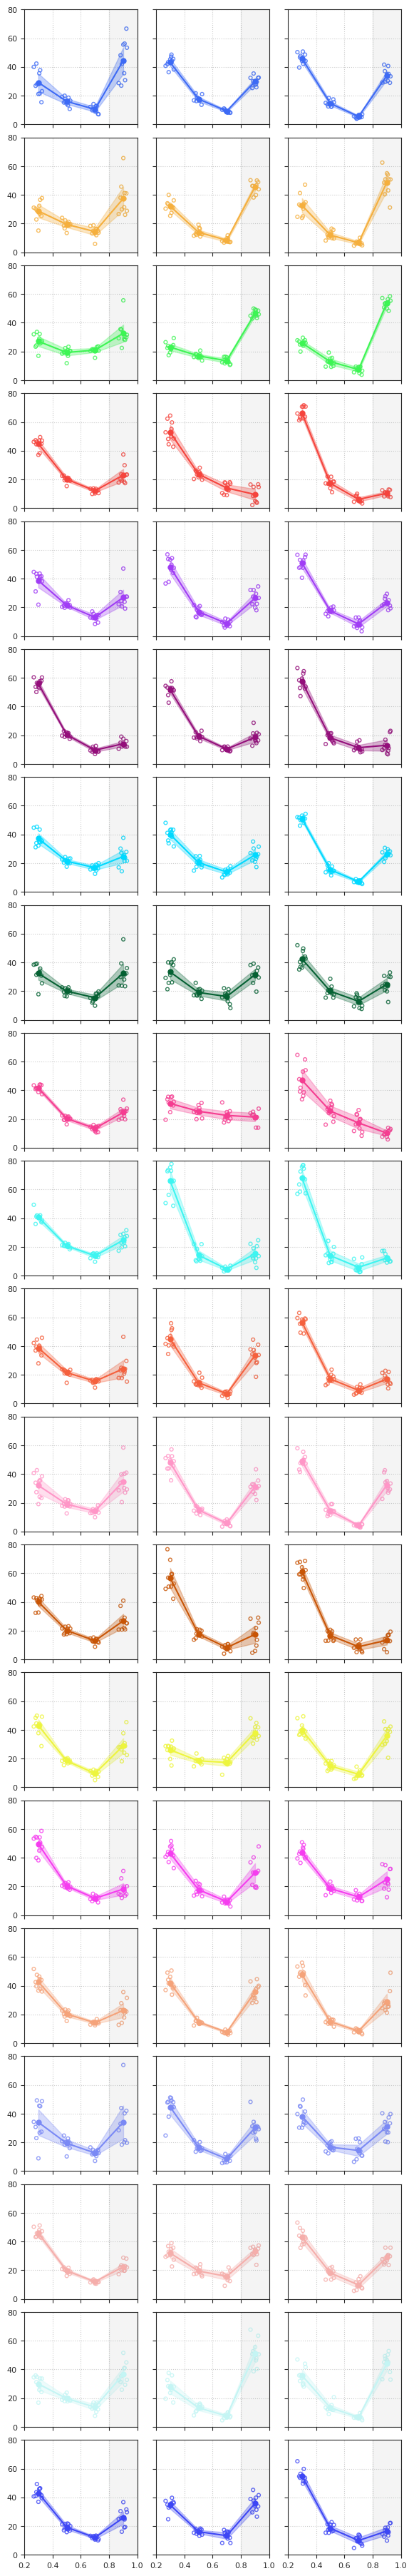

In [16]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'])

fig.savefig(pjoin(fig_dir, f'prop_ln_K{num_k}.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, f'props_ln_K{num_k}.png'), **kws_fig)